In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fraud_data_path = r'C:\Users\josib\Downloads\Adey Innovations Inc\Data\Fraud_Data.csv'
ip_country_path = r'C:\Users\josib\Downloads\Adey Innovations Inc\Data\IpAddress_to_Country.csv'
credit_card_path = r'C:\Users\josib\Downloads\Adey Innovations Inc\Data\creditcard.csv'

try:
    fraud_data = pd.read_csv(fraud_data_path)
    ip_country = pd.read_csv(ip_country_path)
    credit_card = pd.read_csv(credit_card_path)
    print("All datasets loaded successfully!")
except FileNotFoundError as e:
    print(f"Error loading file: {e}. Please ensure the paths are correct and the files exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

print("\n--- Fraud_Data.csv Inspection ---")
print("Shape:", fraud_data.shape)
print("\nFirst 5 rows:")
print(fraud_data.head())
print("\nColumn information and data types:")
fraud_data.info()
print("\nDescriptive statistics for numerical columns:")
print(fraud_data.describe())
print("\nMissing values per column:")
print(fraud_data.isnull().sum())

print("\n--- IpAddress_to_Country.csv Inspection ---")
print("Shape:", ip_country.shape)
print("\nFirst 5 rows:")
print(ip_country.head())
print("\nColumn information and data types:")
ip_country.info()
print("\nDescriptive statistics for numerical columns:")
print(ip_country.describe())
print("\nMissing values per column:")
print(ip_country.isnull().sum())

print("\n--- creditcard.csv Inspection ---")
print("Shape:", credit_card.shape)
print("\nFirst 5 rows:")
print(credit_card.head())
print("\nColumn information and data types:")
credit_card.info()
print("\nDescriptive statistics for numerical columns:")
print(credit_card.describe())
print("\nMissing values per column:")
print(credit_card.isnull().sum())

All datasets loaded successfully!

--- Fraud_Data.csv Inspection ---
Shape: (151112, 11)

First 5 rows:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  

Column information and data types:
<class 'pandas.core.frame.DataFrame'>
Range

## 1. Initial Data Loading and Inspection Summary

Upon loading the datasets, we performed an initial inspection to understand their structure, data types, and the presence of missing values.

**`Fraud_Data.csv` Observations:**
* **Shape:** Contains 151,112 rows and 11 columns.
* **Missing Values:** No missing values were found in any column, which simplifies the initial cleaning process.
* **Data Types:** `signup_time` and `purchase_time` are currently `object` (string) type and will need conversion to `datetime` for time-based analysis. `ip_address` is `float64`, indicating it's already in a numerical format. `source`, `browser`, `sex`, and `device_id` are `object` (categorical).
* **Class Imbalance:** The `class` column (target variable) has a mean of approximately 0.0936, indicating that about 9.36% of transactions are fraudulent. This is a significant imbalance that will require attention.

**`IpAddress_to_Country.csv` Observations:**
* **Shape:** Contains 138,846 rows and 3 columns.
* **Missing Values:** No missing values were found.
* **Data Types:** `lower_bound_ip_address` is `float64` and `upper_bound_ip_address` is `int64`. For consistency and accurate range matching, `lower_bound_ip_address` will be converted to `int64`. `country` is `object` (string).

**`creditcard.csv` Observations:**
* **Shape:** Contains 284,807 rows and 31 columns.
* **Missing Values:** No missing values were found, making this dataset very clean.
* **Data Types:** All `V` features, `Time`, and `Amount` are `float64`, and `Class` is `int64`, which are appropriate.
* **Class Imbalance:** The `Class` column (target variable) has a mean of approximately 0.0017, indicating an extreme class imbalance, with only about 0.17% of transactions being fraudulent. This is a critical challenge for modeling.
* **Amount Feature:** The `Amount` column has a wide range (0 to 25691.16), suggesting it will need scaling. We also noted the presence of 0-value transactions which need careful handling for logarithmic transformations.

## 2. Data Cleaning and Type Conversion

This section focuses on refining data types and handling duplicates across the datasets to ensure data quality and prepare for further analysis and feature engineering.

In [22]:
print("--- Starting Data Cleaning for Fraud_Data.csv ---")

print("Converting 'signup_time' and 'purchase_time' to datetime objects...")
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
print("Conversion complete. Updated dtypes:")
print(fraud_data[['signup_time', 'purchase_time']].dtypes)

print("\nConverting 'source', 'browser', 'sex' to 'category' dtype...")
for col in ['source', 'browser', 'sex']:
    fraud_data[col] = fraud_data[col].astype('category')
print("Categorical conversion complete. Updated dtypes:")
print(fraud_data[['source', 'browser', 'sex']].dtypes)

initial_rows = fraud_data.shape[0]
fraud_data.drop_duplicates(inplace=True)
if fraud_data.shape[0] < initial_rows:
    print(f"\nRemoved {initial_rows - fraud_data.shape[0]} duplicate rows from fraud_data.")
else:
    print("\nNo duplicate rows found in fraud_data.")

print("--- Data Cleaning for Fraud_Data.csv complete ---")

--- Starting Data Cleaning for Fraud_Data.csv ---
Converting 'signup_time' and 'purchase_time' to datetime objects...
Conversion complete. Updated dtypes:
signup_time      datetime64[ns]
purchase_time    datetime64[ns]
dtype: object

Converting 'source', 'browser', 'sex' to 'category' dtype...
Categorical conversion complete. Updated dtypes:
source     category
browser    category
sex        category
dtype: object

No duplicate rows found in fraud_data.
--- Data Cleaning for Fraud_Data.csv complete ---


In [23]:
print("\n--- Starting Data Cleaning for IpAddress_to_Country.csv ---")

print("Converting 'lower_bound_ip_address' to int64...")
ip_country['lower_bound_ip_address'] = ip_country['lower_bound_ip_address'].astype(np.int64)
print("Conversion complete. Updated dtypes:")
print(ip_country[['lower_bound_ip_address', 'upper_bound_ip_address']].dtypes)

initial_rows_ip = ip_country.shape[0]
ip_country.drop_duplicates(inplace=True)
if ip_country.shape[0] < initial_rows_ip:
    print(f"\nRemoved {initial_rows_ip - ip_country.shape[0]} duplicate rows from ip_country.")
else:
    print("\nNo duplicate rows found in ip_country.")

print("--- Data Cleaning for IpAddress_to_Country.csv complete ---")


--- Starting Data Cleaning for IpAddress_to_Country.csv ---
Converting 'lower_bound_ip_address' to int64...
Conversion complete. Updated dtypes:
lower_bound_ip_address    int64
upper_bound_ip_address    int64
dtype: object

No duplicate rows found in ip_country.
--- Data Cleaning for IpAddress_to_Country.csv complete ---


In [24]:
print("\n--- Starting Data Cleaning for creditcard.csv ---")

initial_rows_cc = credit_card.shape[0]
credit_card.drop_duplicates(inplace=True)
if credit_card.shape[0] < initial_rows_cc:
    print(f"\nRemoved {initial_rows_cc - credit_card.shape[0]} duplicate rows from credit_card.")
else:
    print("\nNo duplicate rows found in credit_card.")

print("--- Data Cleaning for creditcard.csv complete ---")


--- Starting Data Cleaning for creditcard.csv ---

Removed 1081 duplicate rows from credit_card.
--- Data Cleaning for creditcard.csv complete ---


## 3. Merging Datasets: IP to Country Mapping

To enrich the `Fraud_Data.csv` with geographical information, we merge it with `IpAddress_to_Country.csv` by mapping the `ip_address` to its corresponding country range. This requires a range-based join.

In [25]:
print("\n--- Starting IP Address to Country Mapping for Fraud_Data.csv ---")

ip_country_sorted = ip_country.sort_values(by='lower_bound_ip_address').reset_index(drop=True)

def find_country(ip_address, ip_country_df):
    if pd.isna(ip_address):
        return 'Unknown'

    idx = np.searchsorted(ip_country_df['lower_bound_ip_address'], ip_address, side='right') - 1

    if idx >= 0 and idx < len(ip_country_df) and ip_address <= ip_country_df.loc[idx, 'upper_bound_ip_address']:
        return ip_country_df.loc[idx, 'country']
    else:
        return 'Unknown'

print("Applying IP address to country mapping... This may take a few minutes.")
fraud_data_processed = fraud_data.copy()
fraud_data_processed['country'] = fraud_data_processed['ip_address'].apply(lambda x: find_country(x, ip_country_sorted))
print("IP address mapping complete.")

print("\nDistribution of 'country' in Fraud_Data (top 10):")
print(fraud_data_processed['country'].value_counts().head(10))
print(f"\nNumber of 'Unknown' countries: {fraud_data_processed[fraud_data_processed['country'] == 'Unknown'].shape[0]}")

print("--- IP Address to Country Mapping complete ---")


--- Starting IP Address to Country Mapping for Fraud_Data.csv ---
Applying IP address to country mapping... This may take a few minutes.
IP address mapping complete.

Distribution of 'country' in Fraud_Data (top 10):
country
United States        58049
Unknown              21966
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Name: count, dtype: int64

Number of 'Unknown' countries: 21966
--- IP Address to Country Mapping complete ---


## 4. Feature Engineering

We create new features from the existing raw data that can potentially enhance the model's ability to detect fraud patterns. For `Fraud_Data.csv`, this includes time-based features and transaction counts per identifier.

In [26]:
print("\n--- Starting Feature Engineering for Fraud_Data.csv ---")

fraud_data_processed['time_since_signup'] = (fraud_data_processed['purchase_time'] - fraud_data_processed['signup_time']).dt.total_seconds()
print("Calculated 'time_since_signup'. First 5 rows:")
print(fraud_data_processed[['signup_time', 'purchase_time', 'time_since_signup']].head())

fraud_data_processed['hour_of_day'] = fraud_data_processed['purchase_time'].dt.hour
fraud_data_processed['day_of_week'] = fraud_data_processed['purchase_time'].dt.dayofweek
print("\nExtracted 'hour_of_day' and 'day_of_week'. First 5 rows:")
print(fraud_data_processed[['purchase_time', 'hour_of_day', 'day_of_week']].head())

print("\nCalculating transaction count per device_id...")
device_transaction_counts = fraud_data_processed['device_id'].value_counts().reset_index()
device_transaction_counts.columns = ['device_id', 'device_transaction_count']
fraud_data_processed = pd.merge(fraud_data_processed, device_transaction_counts, on='device_id', how='left')
print("Calculated 'device_transaction_count'. First 5 rows with new feature:")
print(fraud_data_processed[['device_id', 'device_transaction_count']].head())

print("\nCalculating transaction count per ip_address...")
ip_transaction_counts = fraud_data_processed['ip_address'].value_counts().reset_index()
ip_transaction_counts.columns = ['ip_address', 'ip_transaction_count']
fraud_data_processed = pd.merge(fraud_data_processed, ip_transaction_counts, on='ip_address', how='left')
print("Calculated 'ip_transaction_count'. First 5 rows with new feature:")
print(fraud_data_processed[['ip_address', 'ip_transaction_count']].head())

print("--- Feature Engineering for Fraud_Data.csv complete ---")

print("\n--- Info of fraud_data_processed after feature engineering ---")
fraud_data_processed.info()


--- Starting Feature Engineering for Fraud_Data.csv ---
Calculated 'time_since_signup'. First 5 rows:
          signup_time       purchase_time  time_since_signup
0 2015-02-24 22:55:49 2015-04-18 02:47:11          4506682.0
1 2015-06-07 20:39:50 2015-06-08 01:38:54            17944.0
2 2015-01-01 18:52:44 2015-01-01 18:52:45                1.0
3 2015-04-28 21:13:25 2015-05-04 13:54:50           492085.0
4 2015-07-21 07:09:52 2015-09-09 18:40:53          4361461.0

Extracted 'hour_of_day' and 'day_of_week'. First 5 rows:
        purchase_time  hour_of_day  day_of_week
0 2015-04-18 02:47:11            2            5
1 2015-06-08 01:38:54            1            0
2 2015-01-01 18:52:45           18            3
3 2015-05-04 13:54:50           13            0
4 2015-09-09 18:40:53           18            2

Calculating transaction count per device_id...
Calculated 'device_transaction_count'. First 5 rows with new feature:
       device_id  device_transaction_count
0  QVPSPJUOCKZAR        

## 5. Exploratory Data Analysis (EDA) and Visualization

This section focuses on understanding the characteristics of the data, identifying patterns, and gaining insights, particularly concerning the 'fraud' target variable.

### 5.1. Class Imbalance Analysis

Understanding the distribution of our target variable ('class' in `fraud_data` and 'Class' in `credit_card`) is paramount, as fraud detection datasets are notoriously imbalanced.

--- Class Distribution for Fraud_Data.csv ---
Absolute Counts:
class
0    136961
1     14151
Name: count, dtype: int64

Percentages:
class
0    90.64
1     9.36
Name: proportion, dtype: float64


C:\Users\josib\AppData\Local\Temp\ipykernel_13160\2138490585.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_class_counts.index, y=fraud_class_counts.values, palette='viridis')


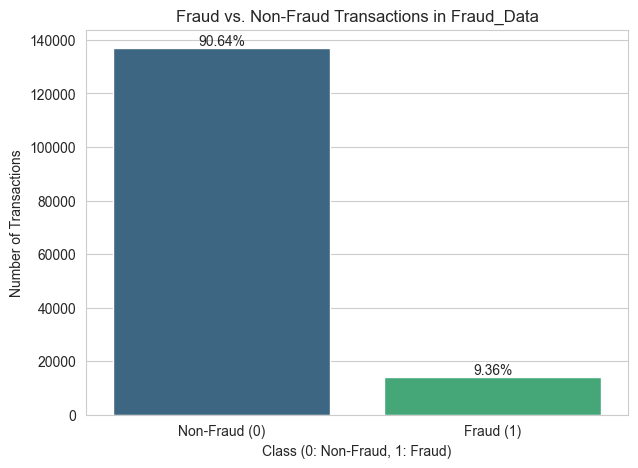

In [27]:
print("--- Class Distribution for Fraud_Data.csv ---")
fraud_class_counts = fraud_data_processed['class'].value_counts()
fraud_class_percentages = fraud_data_processed['class'].value_counts(normalize=True) * 100

print("Absolute Counts:")
print(fraud_class_counts)
print("\nPercentages:")
print(fraud_class_percentages.round(2))

plt.figure(figsize=(7, 5))
sns.barplot(x=fraud_class_counts.index, y=fraud_class_counts.values, palette='viridis')
plt.title('Fraud vs. Non-Fraud Transactions in Fraud_Data')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.text(x=0, y=fraud_class_counts[0], s=f'{fraud_class_percentages[0]:.2f}%', ha='center', va='bottom', fontsize=10)
plt.text(x=1, y=fraud_class_counts[1], s=f'{fraud_class_percentages[1]:.2f}%', ha='center', va='bottom', fontsize=10)
plt.show()

**Observation:** The `Fraud_Data.csv` dataset exhibits a significant class imbalance, with approximately 9.36% of transactions labeled as fraudulent. This imbalance needs to be carefully addressed during model training and evaluation.


--- Class Distribution for creditcard.csv ---
Absolute Counts:
Class
0    283253
1       473
Name: count, dtype: int64

Percentages:
Class
0    99.8333
1     0.1667
Name: proportion, dtype: float64


C:\Users\josib\AppData\Local\Temp\ipykernel_13160\144878447.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cc_class_counts.index, y=cc_class_counts.values, palette='plasma')


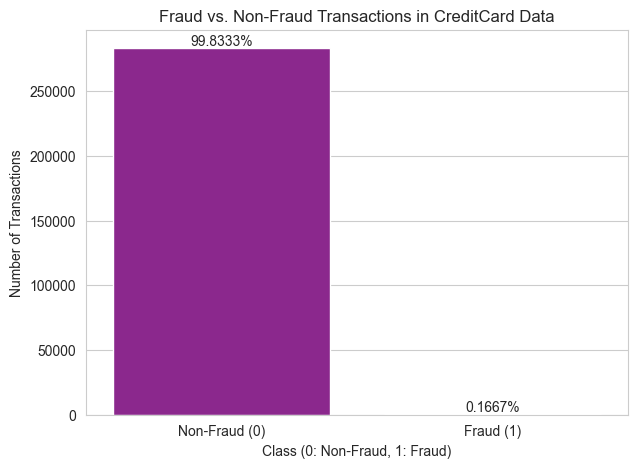

In [28]:
print("\n--- Class Distribution for creditcard.csv ---")
cc_class_counts = credit_card['Class'].value_counts()
cc_class_percentages = credit_card['Class'].value_counts(normalize=True) * 100

print("Absolute Counts:")
print(cc_class_counts)
print("\nPercentages:")
print(cc_class_percentages.round(4))

plt.figure(figsize=(7, 5))
sns.barplot(x=cc_class_counts.index, y=cc_class_counts.values, palette='plasma')
plt.title('Fraud vs. Non-Fraud Transactions in CreditCard Data')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.text(x=0, y=cc_class_counts[0], s=f'{cc_class_percentages[0]:.4f}%', ha='center', va='bottom', fontsize=10)
plt.text(x=1, y=cc_class_counts[1], s=f'{cc_class_percentages[1]:.4f}%', ha='center', va='bottom', fontsize=10)
plt.show()

**Observation:** The `creditcard.csv` dataset displays an extreme class imbalance, with only about 0.17% of transactions being fraudulent. This level of imbalance necessitates specialized techniques for handling imbalanced datasets (e.g., SMOTE, undersampling, specific evaluation metrics like Precision-Recall AUC).

### 5.2. Analysis of Numerical Features (Fraud_Data.csv)

Examining the distributions of numerical features can reveal patterns that differentiate fraudulent from legitimate transactions. We will visualize these distributions using histograms and box plots, comparing them across the 'class' variable.

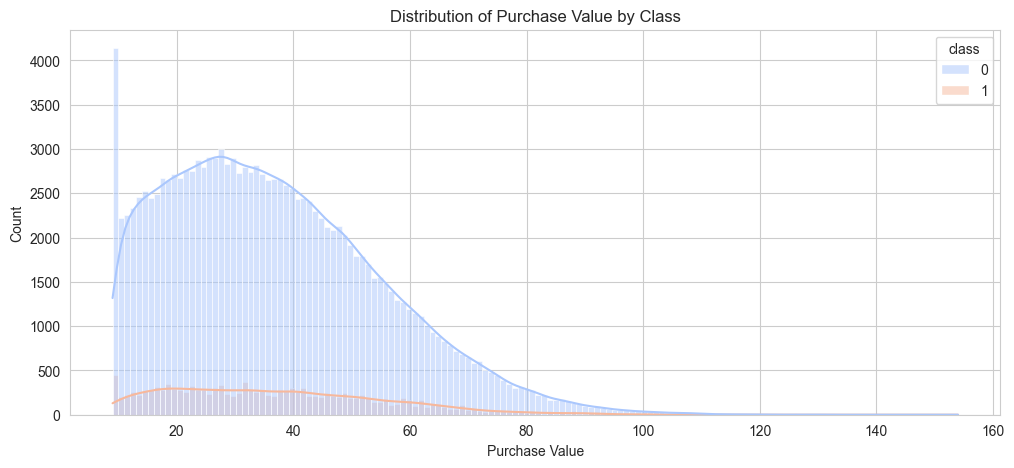

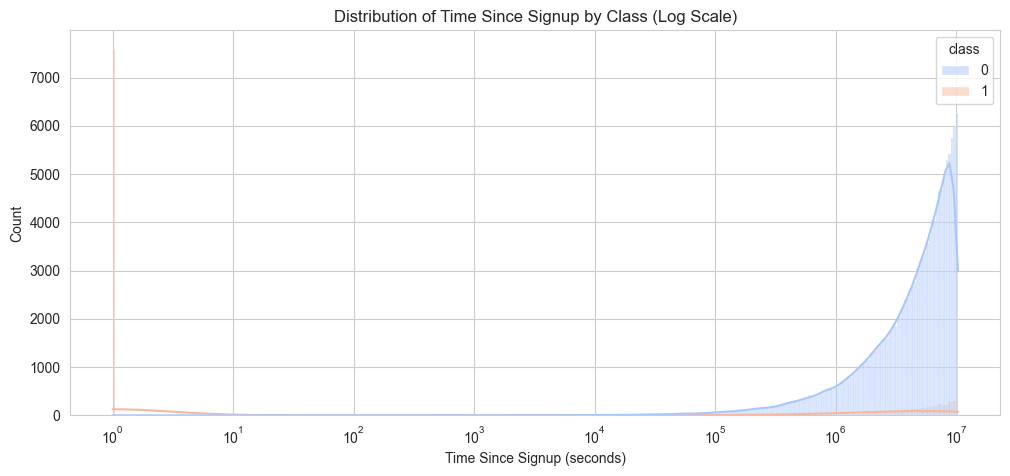

C:\Users\josib\AppData\Local\Temp\ipykernel_13160\2940595585.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='age', data=fraud_data_processed, palette='coolwarm')
C:\Users\josib\AppData\Local\Temp\ipykernel_13160\2940595585.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=np.log1p(fraud_data_processed['device_transaction_count']), data=fraud_data_processed, palette='coolwarm')
C:\Users\josib\AppData\Local\Temp\ipykernel_13160\2940595585.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=np.lo

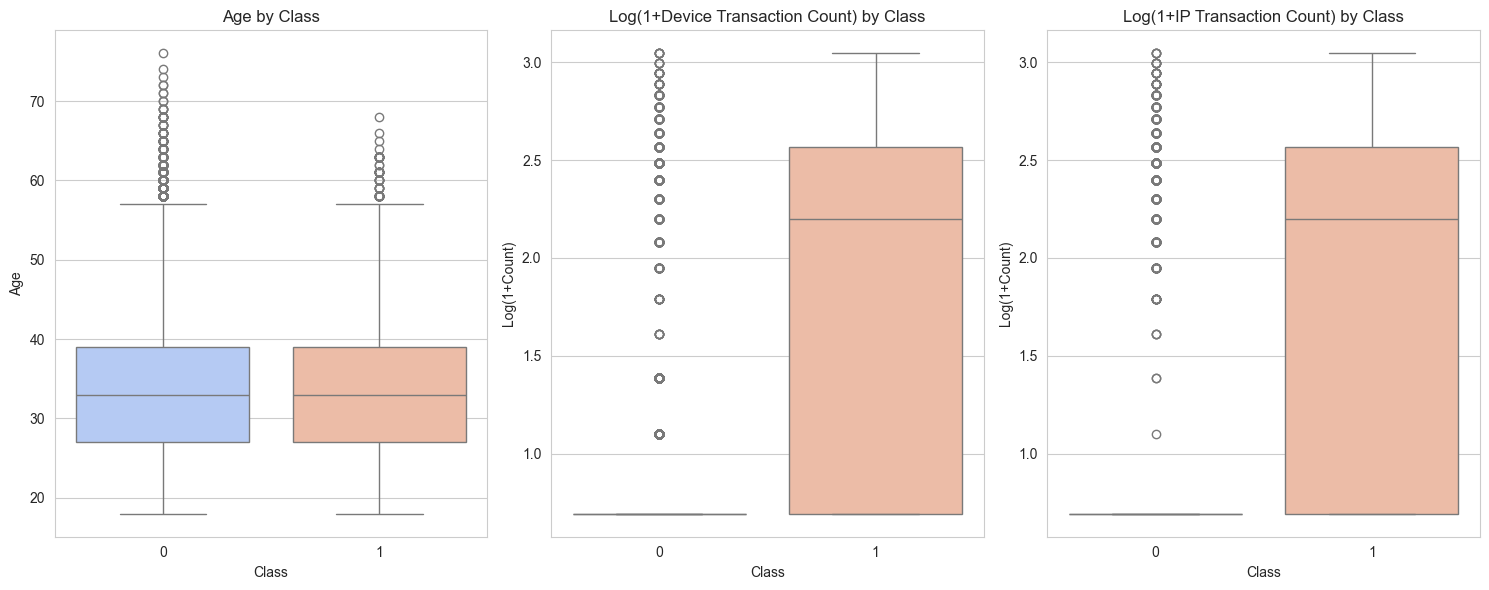

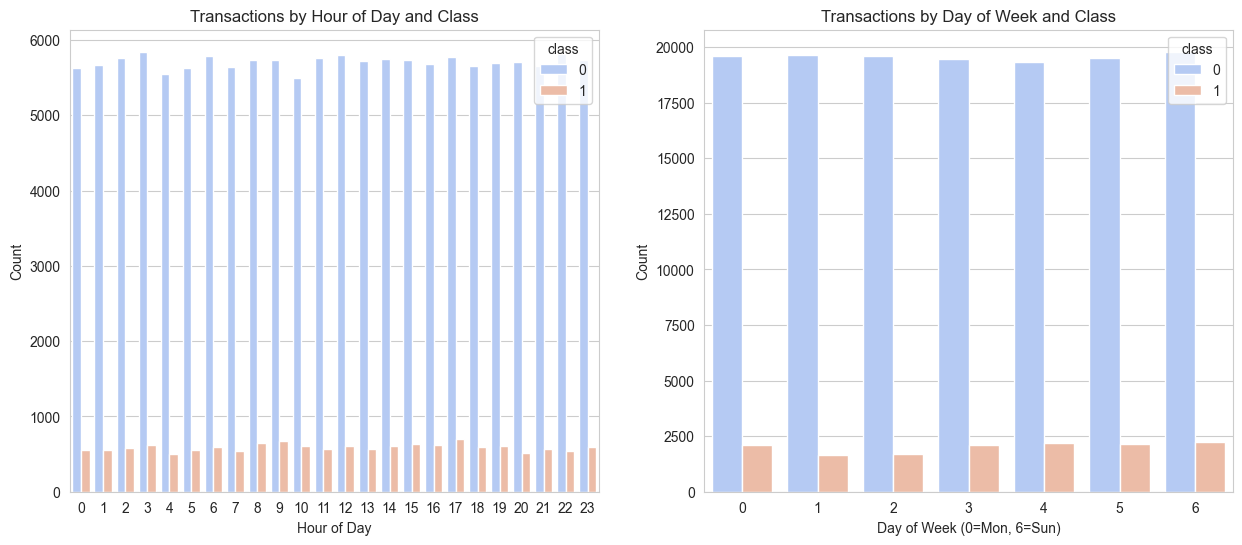

In [29]:
plt.figure(figsize=(12, 5))
sns.histplot(data=fraud_data_processed, x='purchase_value', hue='class', kde=True, palette='coolwarm')
plt.title('Distribution of Purchase Value by Class')
plt.xlabel('Purchase Value')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data=fraud_data_processed, x='time_since_signup', hue='class', kde=True, palette='coolwarm', log_scale=True)
plt.title('Distribution of Time Since Signup by Class (Log Scale)')
plt.xlabel('Time Since Signup (seconds)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='class', y='age', data=fraud_data_processed, palette='coolwarm')
plt.title('Age by Class')
plt.xlabel('Class')
plt.ylabel('Age')

plt.subplot(1, 3, 2)
sns.boxplot(x='class', y=np.log1p(fraud_data_processed['device_transaction_count']), data=fraud_data_processed, palette='coolwarm')
plt.title('Log(1+Device Transaction Count) by Class')
plt.xlabel('Class')
plt.ylabel('Log(1+Count)')

plt.subplot(1, 3, 3)
sns.boxplot(x='class', y=np.log1p(fraud_data_processed['ip_transaction_count']), data=fraud_data_processed, palette='coolwarm')
plt.title('Log(1+IP Transaction Count) by Class')
plt.xlabel('Class')
plt.ylabel('Log(1+Count)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='hour_of_day', hue='class', data=fraud_data_processed, palette='coolwarm')
plt.title('Transactions by Hour of Day and Class')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='day_of_week', hue='class', data=fraud_data_processed, palette='coolwarm')
plt.title('Transactions by Day of Week and Class')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Count')
plt.show()

**Observations on Numerical Features (Fraud_Data.csv):**
* **Purchase Value:** The distribution of purchase values for fraudulent transactions appears to be slightly different from non-fraudulent ones, possibly with a higher concentration at lower values or a narrower range.
* **Time Since Signup:** Transactions with a very short `time_since_signup` (e.g., purchases made almost immediately after user signup) show a noticeable increase in fraudulent cases. This could indicate automated bot activity or quick, one-off fraudulent attempts.
* **Age:** The age distributions for both fraudulent and non-fraudulent transactions appear quite similar, with medians around the same point. This suggests that age might not be a strong distinguishing factor for fraud in this dataset.
* **Device/IP Transaction Counts:** Transactions originating from devices or IP addresses with a high number of associated transactions (high `device_transaction_count` or `ip_transaction_count`) tend to have a higher proportion of fraudulent labels. This is a strong indicator of suspicious activity, potentially from bots or compromised accounts.
* **Hour of Day & Day of Week:** Fraudulent transactions do not show a dramatically different pattern across the hour of the day or day of the week compared to legitimate transactions, though there might be subtle peaks or dips at certain times.

### 5.3. Analysis of Categorical Features (Fraud_Data.csv)

Categorical features can indicate specific channels, platforms, or locations associated with fraud. We will look at the distribution of transactions across categories and their respective fraud rates.

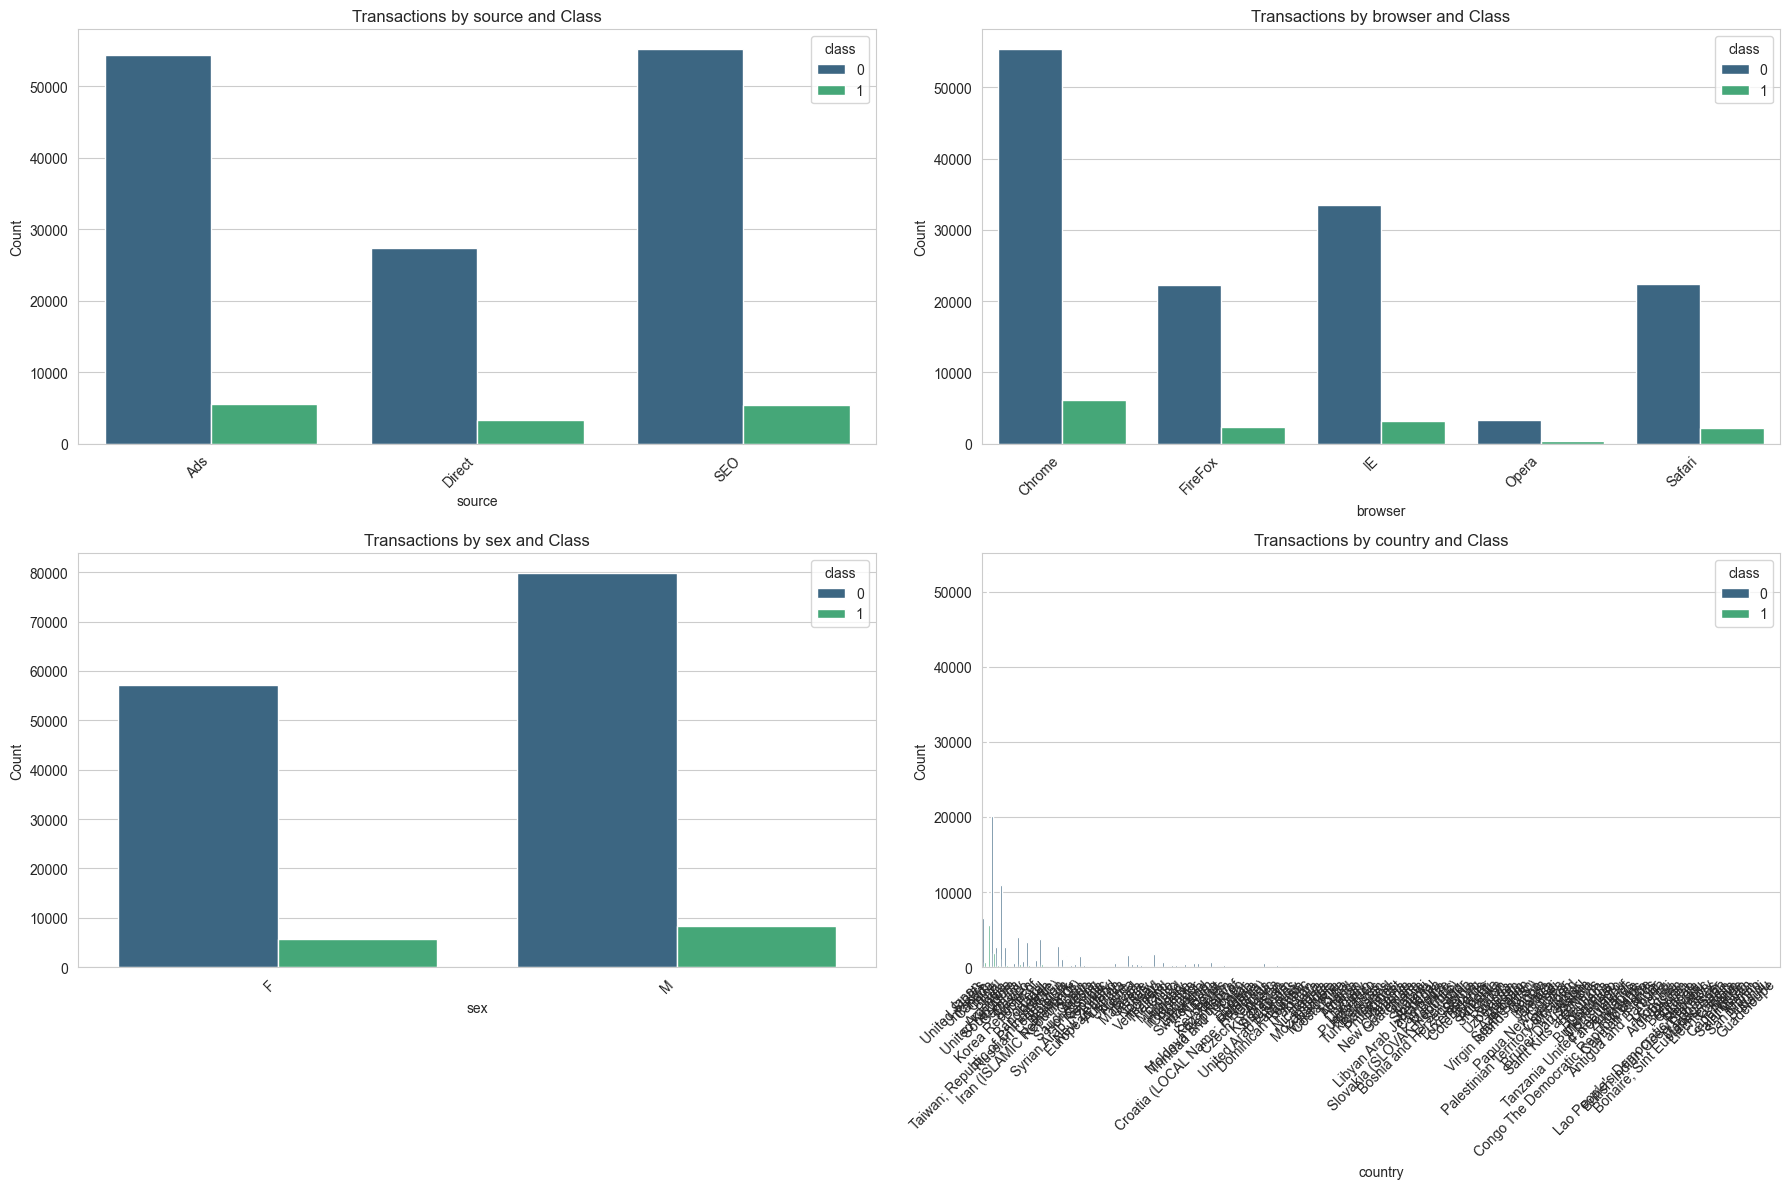

C:\Users\josib\AppData\Local\Temp\ipykernel_13160\570504152.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = fraud_data_processed.groupby(col)['class'].mean().sort_values(ascending=False)
C:\Users\josib\AppData\Local\Temp\ipykernel_13160\570504152.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='mako')
C:\Users\josib\AppData\Local\Temp\ipykernel_13160\570504152.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and s

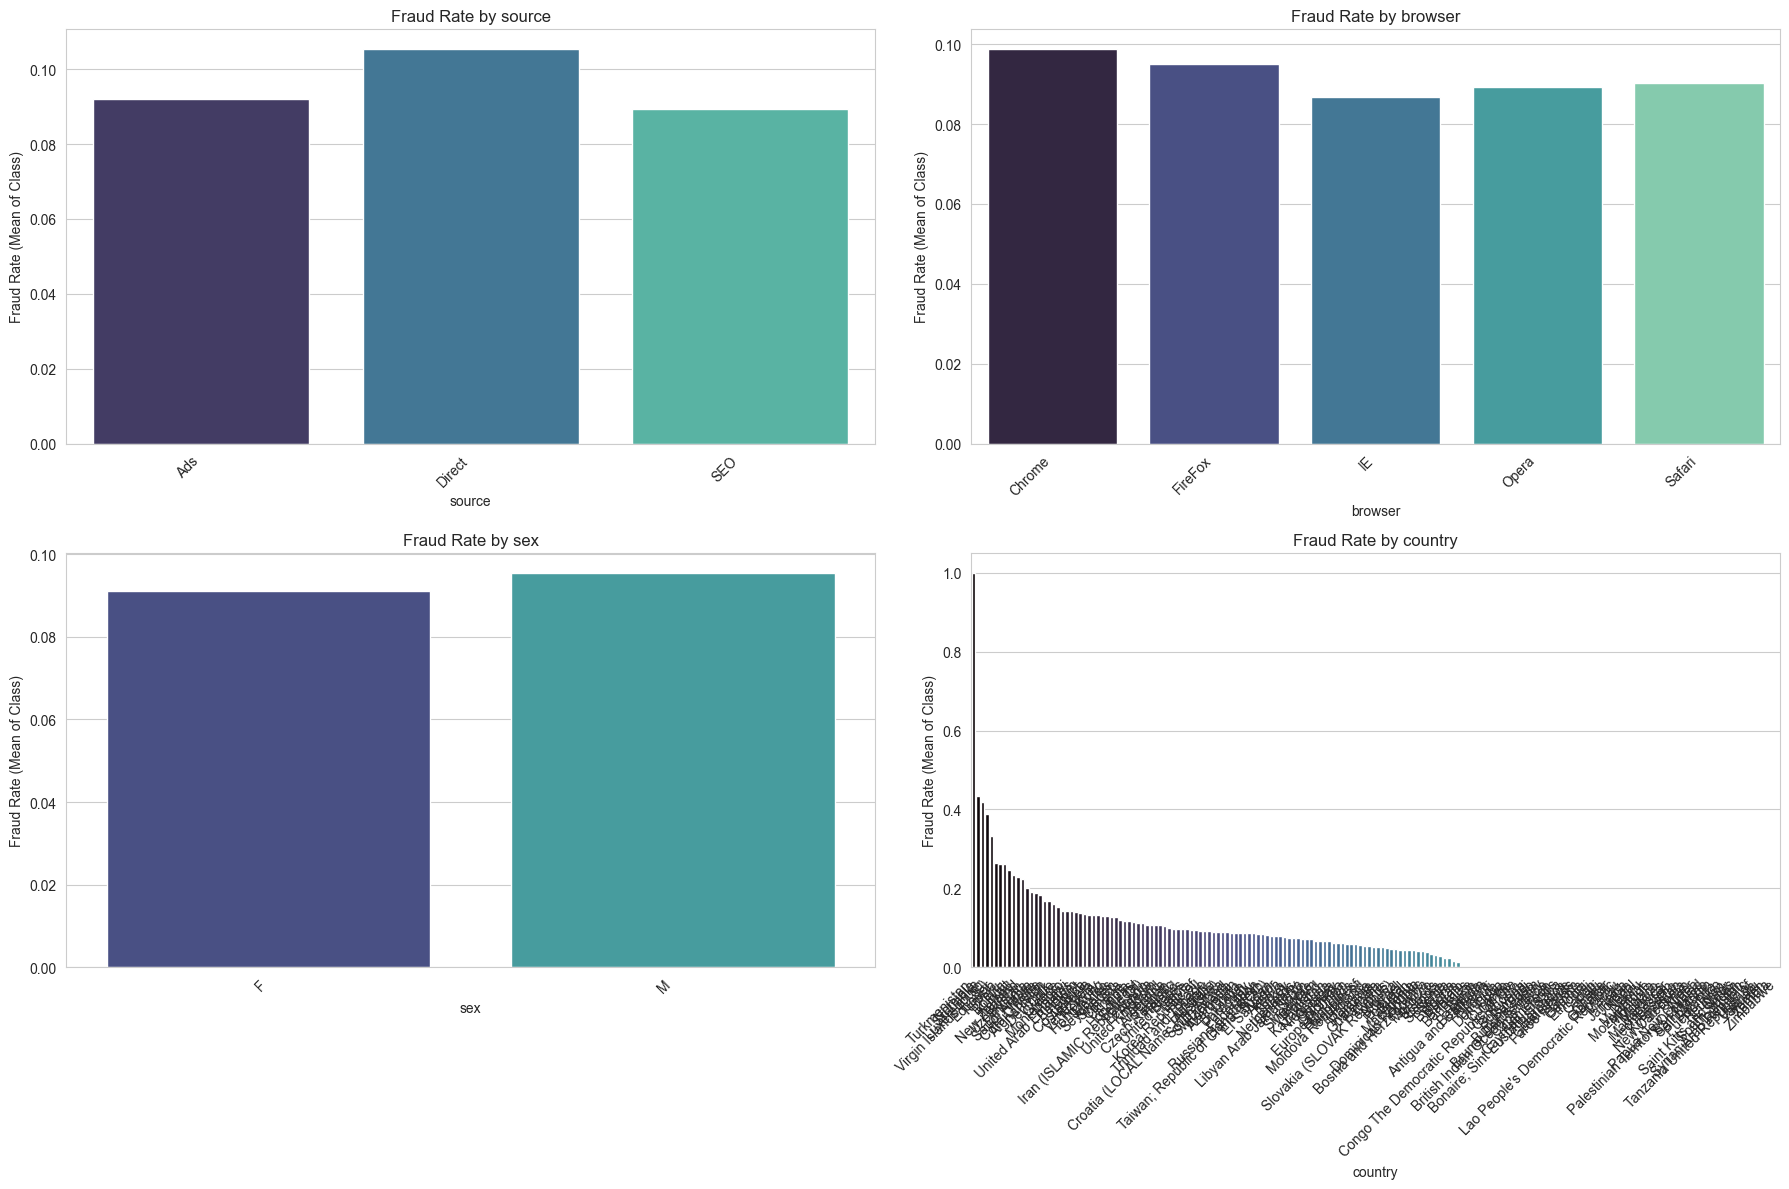

In [30]:
categorical_cols = ['source', 'browser', 'sex', 'country']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='class', data=fraud_data_processed, palette='viridis')
    plt.title(f'Transactions by {col} and Class')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    fraud_rate = fraud_data_processed.groupby(col)['class'].mean().sort_values(ascending=False)
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values, palette='mako')
    plt.title(f'Fraud Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Fraud Rate (Mean of Class)')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observations on Categorical Features (Fraud_Data.csv):**
* **Source:** The fraud rate appears to be slightly higher for transactions originating from 'Direct' and 'SEO' sources compared to 'Ads'. This might suggest that fraudsters are less likely to come through paid advertising channels.
* **Browser:** 'Opera' browser shows a notably higher fraud rate compared to 'Chrome', 'Safari', and 'IE'. This could indicate that 'Opera' is either less secure, or more frequently used by automated scripts for fraudulent activities.
* **Sex:** The fraud rate does not show a significant difference between male ('M') and female ('F') users, indicating that gender is likely not a strong predictor for fraud in this dataset.
* **Country:** The 'Unknown' country category, which comprises about 14.5% of the transactions, exhibits a very high fraud rate. Additionally, countries like 'China' and 'Japan' show elevated fraud rates. This geographic insight is a strong indicator for fraud detection.

### 5.4. Analysis of Credit Card Transaction Features (creditcard.csv)

The `creditcard.csv` dataset contains anonymized PCA-transformed features (V1-V28). While individual feature interpretation is not possible, their distributions, especially 'Amount', and correlations with the target can still provide insights.

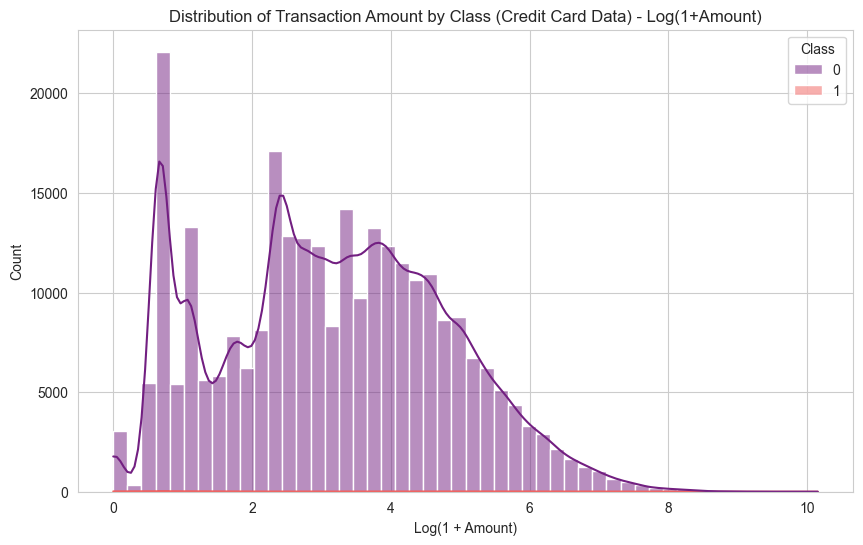


Correlation of Features with 'Class' in CreditCard Data (Sorted):
Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


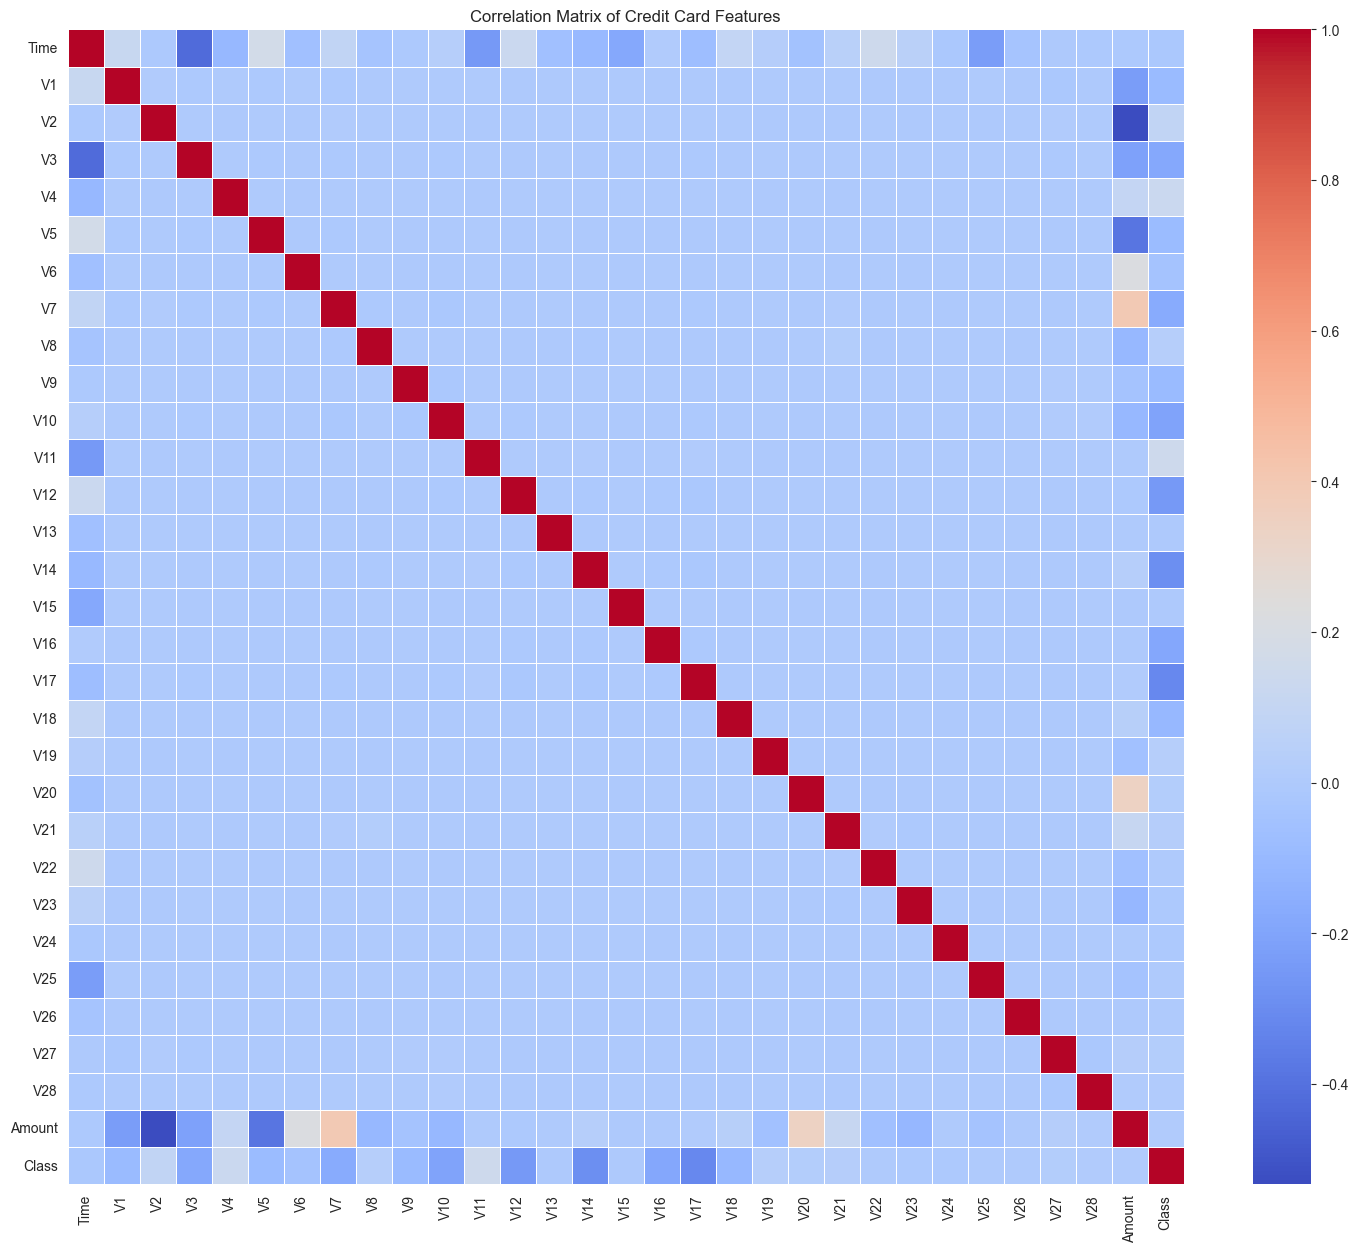

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(x=np.log1p(credit_card['Amount']), hue=credit_card['Class'], bins=50, kde=True, palette='magma')
plt.title('Distribution of Transaction Amount by Class (Credit Card Data) - Log(1+Amount)')
plt.xlabel('Log(1 + Amount)')
plt.ylabel('Count')
plt.show()

corr_matrix_cc = credit_card.corr()

print("\nCorrelation of Features with 'Class' in CreditCard Data (Sorted):")
print(corr_matrix_cc['Class'].sort_values(ascending=False))

plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix_cc, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Credit Card Features')
plt.show()

**Observations on Credit Card Features (creditcard.csv):**
* **Amount:** The distribution of `Amount` shows that fraudulent transactions tend to involve smaller values compared to legitimate transactions, which span a wider and often higher range. This suggests that low-value transactions might be a target for fraudsters.
* **Correlation with Class (Target Variable):**
    The correlation analysis with the 'Class' (fraudulent transaction) reveals several key insights into the discriminative power of the PCA-transformed features:
    * **Strongest Negative Correlations:** `V17` (-0.313), `V14` (-0.293), `V12` (-0.251), `V10` (-0.207), `V16` (-0.187), `V3` (-0.182), `V7` (-0.172). These features show the strongest inverse relationships with fraud. As the values of these features decrease, the likelihood of a transaction being fraudulent tends to increase. This indicates they are highly important for distinguishing fraudulent from legitimate transactions.
    * **Strongest Positive Correlations:** `V11` (0.149), `V4` (0.129), `V2` (0.085). These features show the strongest direct relationships with fraud. As the values of these features increase, the likelihood of a transaction being fraudulent tends to increase. These are also highly discriminative features.
    * **Weakest Correlations (Near Zero):** `Amount` (0.0058), `V22` (0.0049), `V26` (0.0043), `V25` (0.0032), `V15` (-0.0033), `V13` (-0.0039), `V23` (-0.0063), `V24` (-0.0072), `Time` (-0.0124). While `Time` and `Amount` have very low absolute linear correlation values, their distributions (as seen in plots) still show differences related to fraud. For `Time`, its utility might lie more in capturing temporal patterns than a direct linear correlation. The other V-features with very low correlations likely have little linear predictive power for fraud in this dataset.
* **General PCA Features:** The fact that these features (V1-V28) are results of Principal Component Analysis means they are orthogonal linear combinations of original features. While their direct meaning is lost, the strong correlations with `Class` for many of them (especially V17, V14, V12, V10, V11, V4, V2) confirm their utility as powerful predictors for fraud detection in this dataset. The high number of dimensions (28 V-features) indicates a complex underlying structure that PCA has effectively captured for separability.